### prices

In [50]:
import pandas as pd

# src: https://www.investing.com/crypto/bitcoin/btc-usd-historical-data
def get_prices():
    # Чтение CSV файла
    df = pd.read_csv('BTC_USD_Bitfinex_2012-2024.csv', delimiter=',', thousands=',', decimal='.')
    return df

prices = get_prices()
prices = prices[::-1].reset_index(drop=True)
prices['Date'] = pd.to_datetime(prices['Date'])

In [64]:
prices

,Date,Price,Open,High,Low,Vol.,Change %
0,2012-02-02,6.1,6.1,6.1,6.1,NaN,0.00%
1,2012-02-03,6.0,6.0,6.0,6.0,NaN,-2.30%
2,2012-02-04,5.9,5.9,5.9,5.9,NaN,-1.51%
3,2012-02-05,5.7,5.7,5.7,5.7,NaN,-3.07%
4,2012-02-06,5.4,5.4,5.4,5.4,NaN,-4.22%
...,...,...,...,...,...,...,...
4658,2024-11-07,75864.0,75580.0,76655.0,74397.0,1.43K,0.38%
4659,2024-11-08,76496.0,75864.0,77049.0,75611.0,0.80K,0.83%
4660,2024-11-09,76703.0,76496.0,76888.0,75746.0,0.31K,0.27%
4661,2024-11-10,80367.0,76703.0,81428.0,76531.0,4.08K,4.78%


### halvings

In [38]:
import numpy as np
from datetime import datetime, timedelta

# Constants for the Bitcoin reward halving
initial_reward = 50  # initial block reward
halving_interval = 210000  # blocks per halving

# Calculate the halving dates and rewards
halving_dates = [
    datetime(2009, 1, 3),  # Genesis block
    datetime(2012, 11, 28),
    datetime(2016, 7, 9),
    datetime(2020, 5, 11),
    datetime(2024, 4, 19)
]

halving_dates

[datetime.datetime(2009, 1, 3, 0, 0),
 datetime.datetime(2012, 11, 28, 0, 0),
 datetime.datetime(2016, 7, 9, 0, 0),
 datetime.datetime(2020, 5, 11, 0, 0),
 datetime.datetime(2024, 4, 19, 0, 0)]

In [39]:
# Calculate reward per block after each halving
rewards = [initial_reward / (2 ** i) for i in range(len(halving_dates))]
rewards

[50.0, 25.0, 12.5, 6.25, 3.125]

### stock to flow

In [ ]:
def get_stock_to_flow():
    # Constants for the Bitcoin reward halving
    halving_interval = 210000  # blocks per halving
    # Create an empty list to hold the data
    data = []
    total_mined = 0  # Initial total mined
    # Generate the dataset
    for i in range(len(halving_dates)):
        if (i < len(halving_dates) - 1):
            # print(f'debug: True, {i}, {len(halving_dates)}')
            start_date = halving_dates[i]
            end_date = halving_dates[i + 1]
            date_range = pd.date_range(start=start_date, end=end_date - timedelta(days=1), freq='D')
            # Calculate blocks per day for this period
            days_in_period = (end_date - start_date).days
            blocks_per_day = halving_interval / days_in_period
            current_reward = rewards[i]
            for single_date in date_range:
                daily_mined = blocks_per_day * current_reward
                total_mined += daily_mined
                yearly_mined = 365 * daily_mined
                stock_to_flow = total_mined / yearly_mined
                data.append([single_date, total_mined, daily_mined, yearly_mined, current_reward, stock_to_flow])
        else:
            # print(f'debug: False, {i}, {len(halving_dates)}')
            start_date = halving_dates[i]
            end_date = prices.iloc[-1]['Date']
            date_range = pd.date_range(start=start_date, end=end_date - timedelta(days=1), freq='D')
            # fixed 144 blocks per day for the last (incomplete) period.
            blocks_per_day = 144
            current_reward = rewards[i]
            for single_date in date_range:
                daily_mined = blocks_per_day * current_reward
                total_mined += daily_mined
                yearly_mined = 365 * daily_mined
                stock_to_flow = total_mined / yearly_mined
                data.append([single_date, total_mined, daily_mined, yearly_mined, current_reward, stock_to_flow])

    # Convert to DataFrame
    df = pd.DataFrame(data, columns=['Date', 'Total Mined', 'Daily Mined', 'Yearly Mined', 'Current Reward', 'Stock to Flow'])
    return df

# Generate and display the dataframe
df = get_stock_to_flow()
df


,Date,Total Mined,Daily Mined,Yearly Mined,Current Reward,Stock to Flow
0,2009-01-03,7.368421e+03,7368.421053,2.689474e+06,50.000,0.002740
1,2009-01-04,1.473684e+04,7368.421053,2.689474e+06,50.000,0.005479
2,2009-01-05,2.210526e+04,7368.421053,2.689474e+06,50.000,0.008219
3,2009-01-06,2.947368e+04,7368.421053,2.689474e+06,50.000,0.010959
4,2009-01-07,3.684211e+04,7368.421053,2.689474e+06,50.000,0.013699
...,...,...,...,...,...,...
5786,2024-11-06,1.977840e+07,450.000000,1.642500e+05,3.125,120.416438
5787,2024-11-07,1.977885e+07,450.000000,1.642500e+05,3.125,120.419178
5788,2024-11-08,1.977930e+07,450.000000,1.642500e+05,3.125,120.421918
5789,2024-11-09,1.977975e+07,450.000000,1.642500e+05,3.125,120.424658


### charts

In [43]:
len(df)

5720

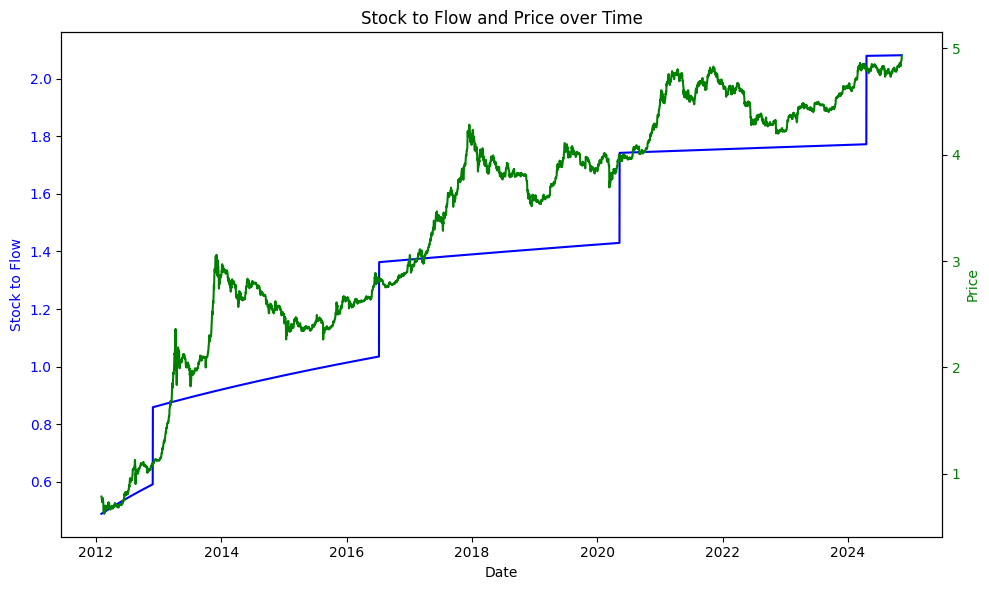

In [62]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

first_price_date = prices['Date'].iloc[0]
s2f = df[df['Date'] >= first_price_date]

# Первая ось для Stock to Flow
ax1.plot(s2f['Date'], np.log10(s2f['Stock to Flow']), label='Stock to Flow', color='b')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock to Flow', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Вторая ось для цены
ax2 = ax1.twinx()
ax2.plot(prices['Date'], np.log10(prices['Price']), label='Price', color='g')
ax2.set_ylabel('Price', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Добавляем заголовок и легенду
plt.title('Stock to Flow and Price over Time')
fig.tight_layout()  # Для предотвращения наложения осей
plt.show()


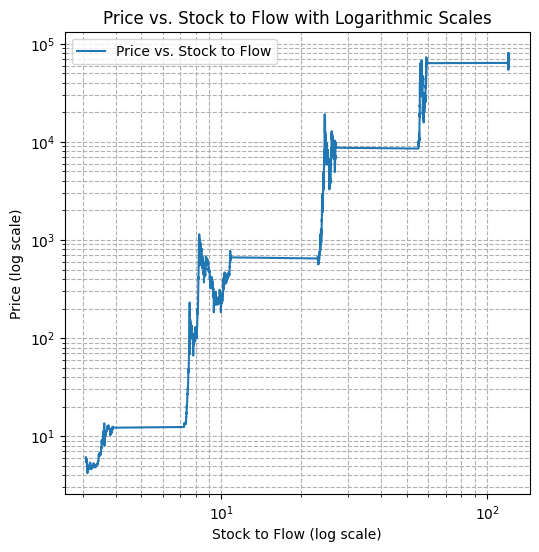

In [ ]:
# now lets try to reproduce the result in the PlanB papper where there is a liniar depencency 
# between log price and log stock-to-flow ratio.

# Убедимся, что есть только те даты, которые присутствуют в обоих DataFrame
merged_df = pd.merge(prices[['Date', 'Price']], df[['Date', 'Stock to Flow']], on='Date', how='inner')

# Строим график
plt.figure(figsize=(6, 6))
plt.loglog(merged_df['Stock to Flow'], merged_df['Price'], label='Price vs. Stock to Flow')

# Добавляем подписи к осям и заголовок
plt.xlabel('Stock to Flow (log scale)')
plt.ylabel('Price (log scale)')
plt.title('Price vs. Stock to Flow with Logarithmic Scales')
plt.legend()
plt.grid(True, which="both", ls="--")  # Логарифмическая сетка
plt.show()


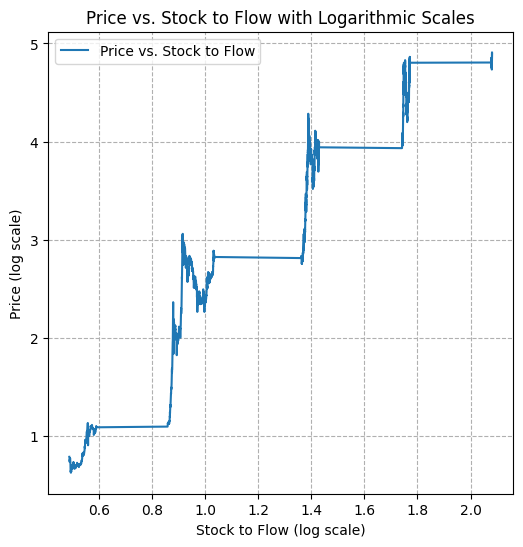

In [ ]:
# now the same chart as the one above but with different labels on axes.

# calc log10 form price and s2f.
s2f_logs = merged_df.copy()
s2f_logs['Stock to Flow'] = np.log10(s2f_logs['Stock to Flow'])
s2f_logs['Price'] = np.log10(s2f_logs['Price'])
# # Создаем новую строку с нулевыми значениями
# new_row = pd.DataFrame({'Date': [pd.NaT], 'Stock to Flow': [0], 'Price': [0]})
# # Добавляем строку в начало
# s2f_logs = pd.concat([new_row, s2f_logs], ignore_index=True)

# Строим график
plt.figure(figsize=(6, 6))
plt.plot(s2f_logs['Stock to Flow'], s2f_logs['Price'], label='Price vs. Stock to Flow')

# Добавляем подписи к осям и заголовок
plt.xlabel('Stock to Flow (log scale)')
plt.ylabel('Price (log scale)')
plt.title('Price vs. Stock to Flow with Logarithmic Scales')
plt.legend()
plt.grid(True, which="both", ls="--")  # Логарифмическая сетка
